In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import umap

C:\Users\mahboub\miniforge3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('./../data/data.csv')

In [3]:
column_name = 'Nationality'

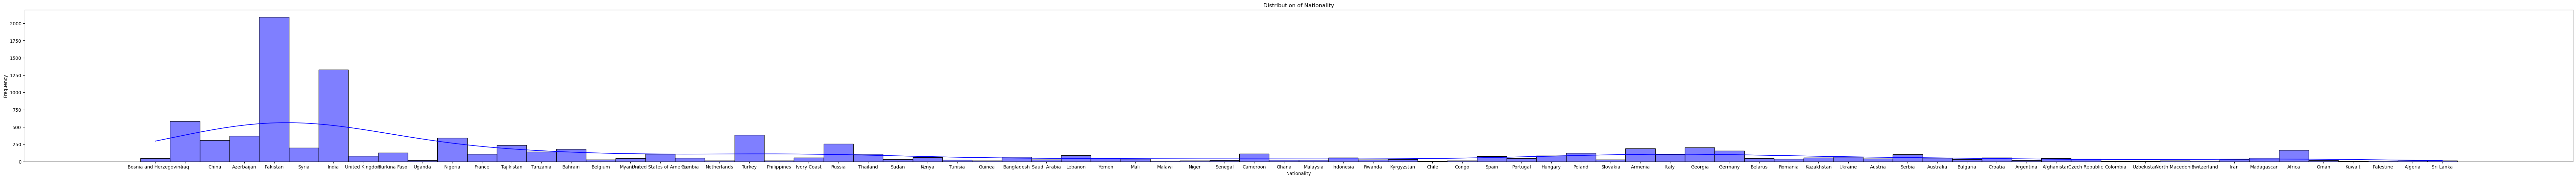

In [4]:
plt.figure(figsize=(100, 6))
sns.histplot(data[column_name], bins=30, kde=True, color='blue')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()


In [5]:
y=data[column_name]
x=[]

In [6]:
for index in data.index:
    real_list = ast.literal_eval(data.at[index,'error_index'])
    if data.at[index,"Gender"]=="مرد":
        real_list.extend([1])
    elif data.at[index,"Gender"]=="زن":
        real_list.extend([2])
    else:
        real_list.extend([0])
    x.append(real_list)

In [7]:
def pad_list(lst, target_length, padding_value=None):
    return lst + [padding_value] * max(0, target_length - len(lst))

In [8]:
def get_max_len(x):
    max_len=-1
    for i in x :
        if len(i)>max_len:
            max_len=len(i)
    return max_len

In [9]:
max_len=get_max_len(x)
for index in range(0,len(x)):
    x[index]=pad_list(x[index],max_len,0)

In [10]:
df = pd.DataFrame(x)
labels = data['Nationality']
df['label'] = labels

In [11]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(x)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['label'] = labels

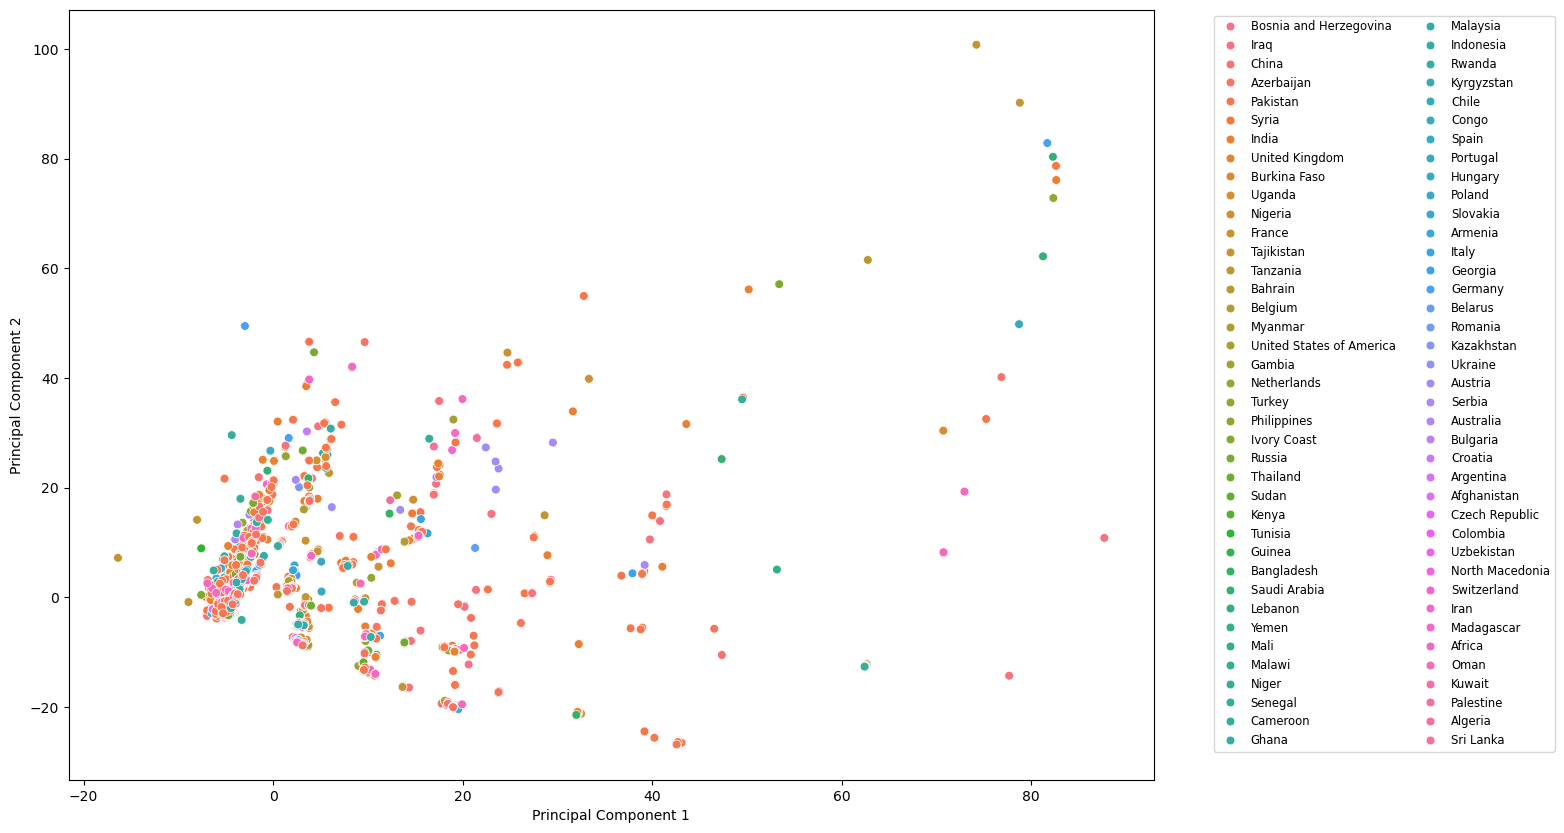

In [12]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=reduced_df, x='PC1', y='PC2', hue='label', palette='husl', legend='full', s=40)
plt.title('')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, fontsize='small')
plt.show()

In [13]:
tsne = TSNE(n_components=2, random_state=0)
reduced_data = tsne.fit_transform(np.array(x))

C:\Users\mahboub\miniforge3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\mahboub\miniforge3\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\mahboub\miniforge3\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\mahboub\miniforge3\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\mahboub\miniforge3\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


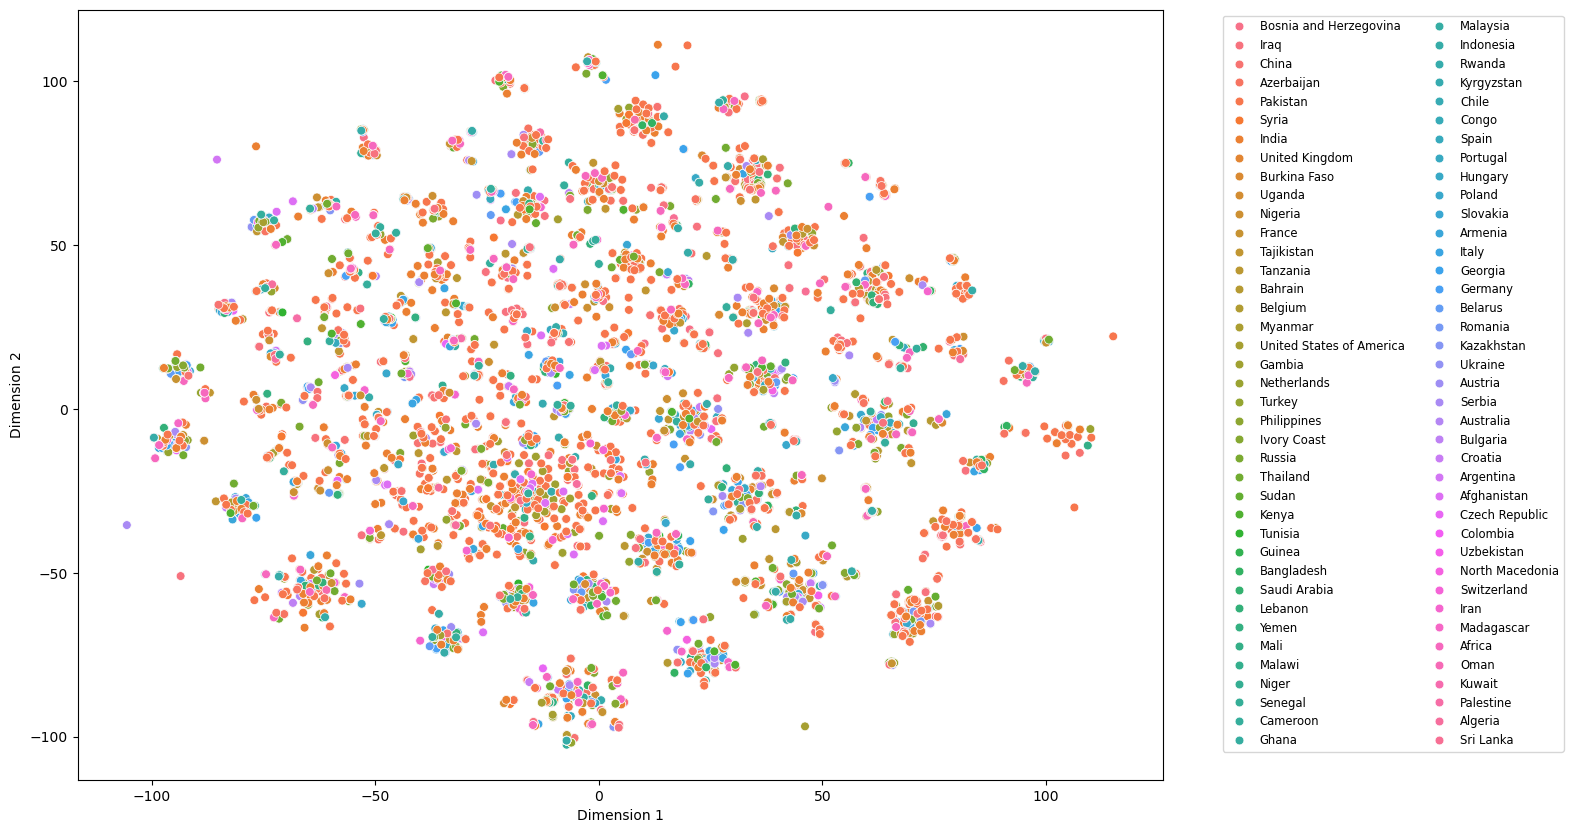

In [14]:
reduced_df = pd.DataFrame(reduced_data, columns=['Dim1', 'Dim2'])
reduced_df['label'] = labels
# Plot the reduced data
plt.figure(figsize=(14, 10))
sns.scatterplot(data=reduced_df, x='Dim1', y='Dim2', hue='label', palette='husl', legend='full', s=40)
plt.title('')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, fontsize='small')
plt.show()

In [15]:
# Apply UMAP to reduce dimensions to 2
umap_reducer = umap.UMAP(n_components=2, random_state=42)
reduced_data = umap_reducer.fit_transform(np.array(x))

# Create a DataFrame with the reduced data
reduced_df = pd.DataFrame(reduced_data, columns=['Dim1', 'Dim2'])
reduced_df['label'] = labels

C:\Users\mahboub\miniforge3\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\mahboub\miniforge3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


C:\Users\mahboub\AppData\Local\Temp\ipykernel_9360\1888200100.py:3: UserWarning: The palette list has more values (79) than needed (78), which may not be intended.
  sns.scatterplot(data=reduced_df, x='Dim1', y='Dim2', hue='label', palette=palette, legend='full', s=40)


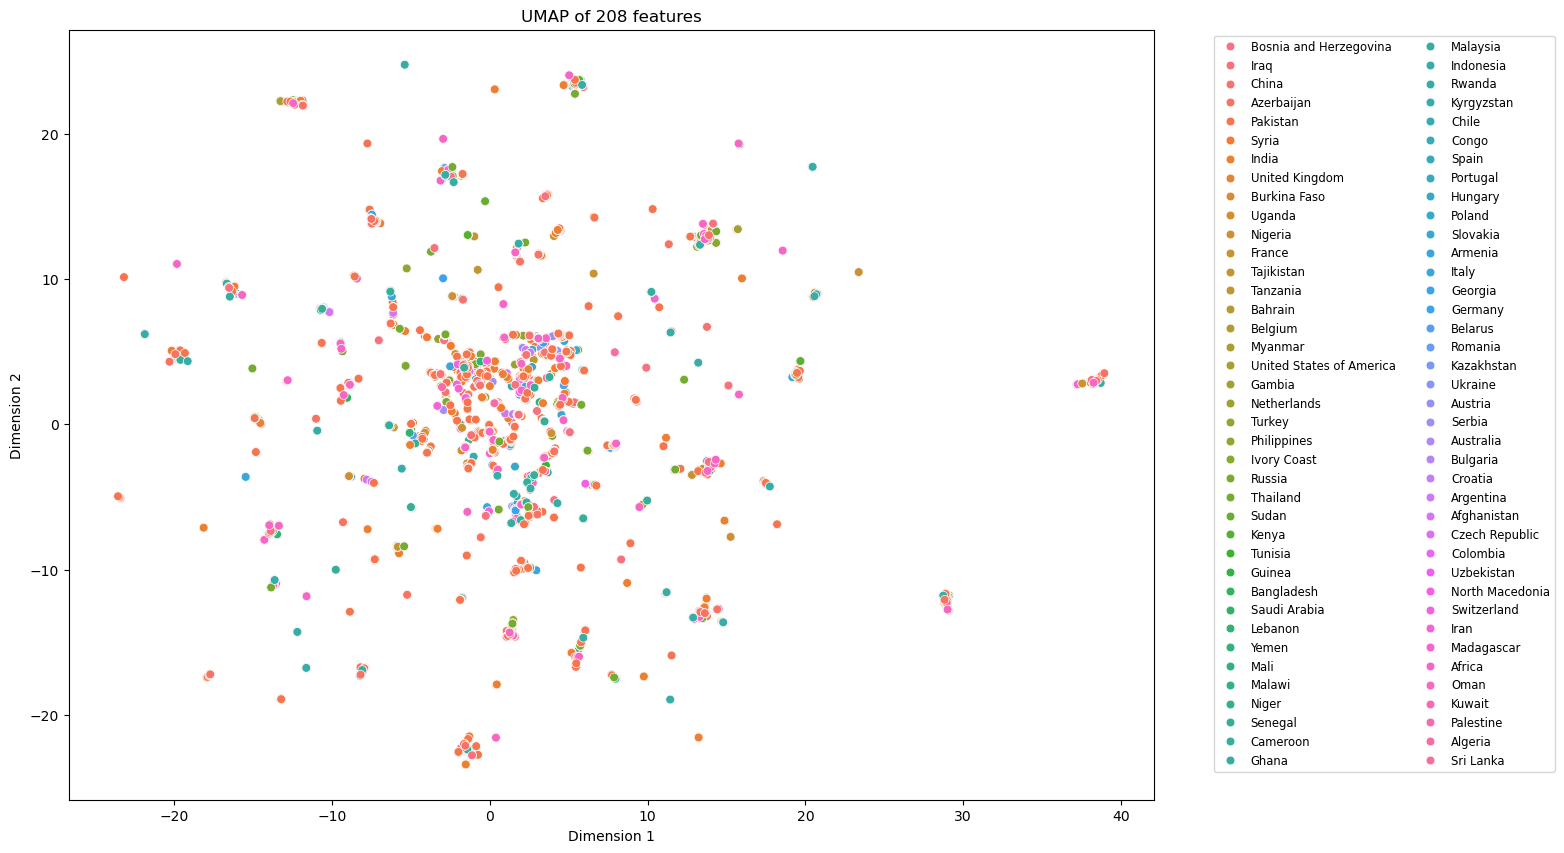

In [16]:
plt.figure(figsize=(14, 10))
palette = sns.color_palette("husl", len(data['Nationality'].unique()))
sns.scatterplot(data=reduced_df, x='Dim1', y='Dim2', hue='label', palette=palette, legend='full', s=40)
plt.title('UMAP of 208 features')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, fontsize='small')
plt.show()